# DECISION TREE CLASSIFICATION – HEART DISEASE DATASET

## Objective

The objective of this assignment is to apply Decision Tree Classification to a given heart disease dataset, analyze the performance of the model, and interpret the results using appropriate evaluation metrics and visualizations.

## Task 1: Data Preparation
Import Required Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_excel('heart_disease.xlsx')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


## Task 2: Exploratory Data Analysis (EDA)
Dataset Structure

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [14]:
df.describe()


,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


### Check for Missing Values

In [17]:
df.isnull().sum()


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

### Feature Distribution
Histograms (Numerical Features Only)

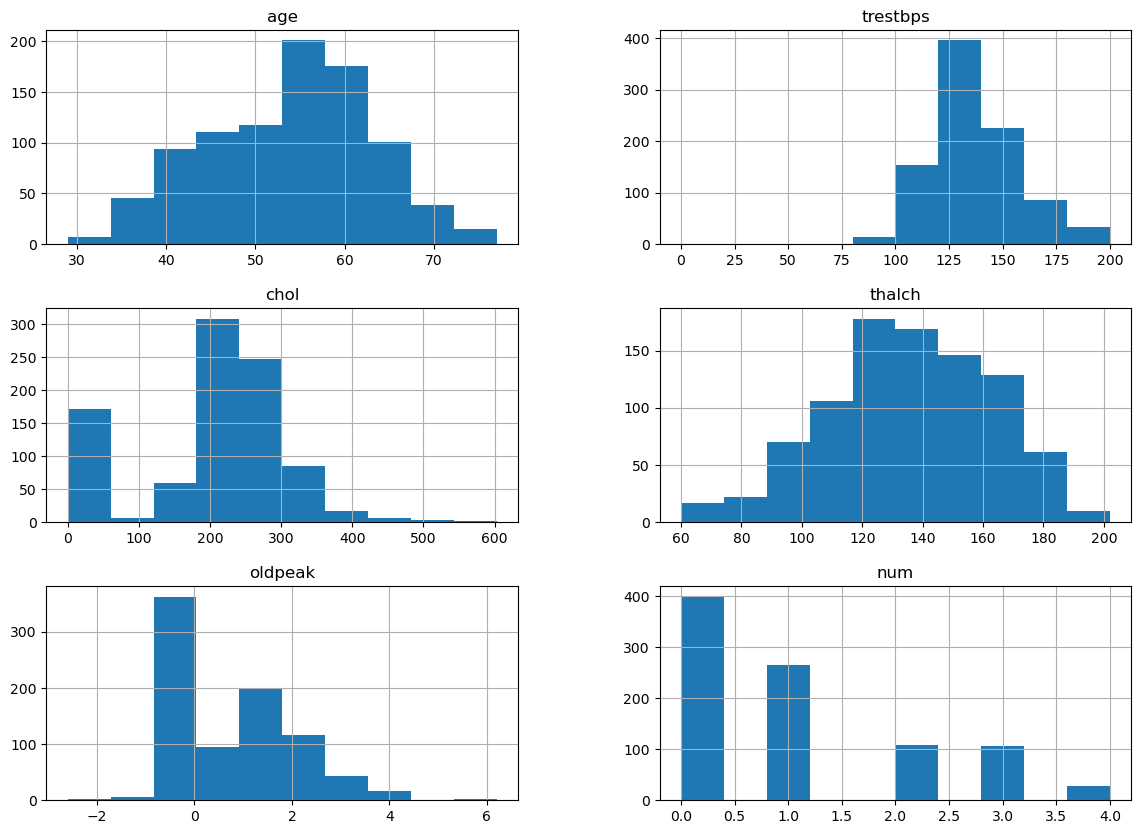

In [20]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols].hist(figsize=(14,10))
plt.show()


### Box Plots

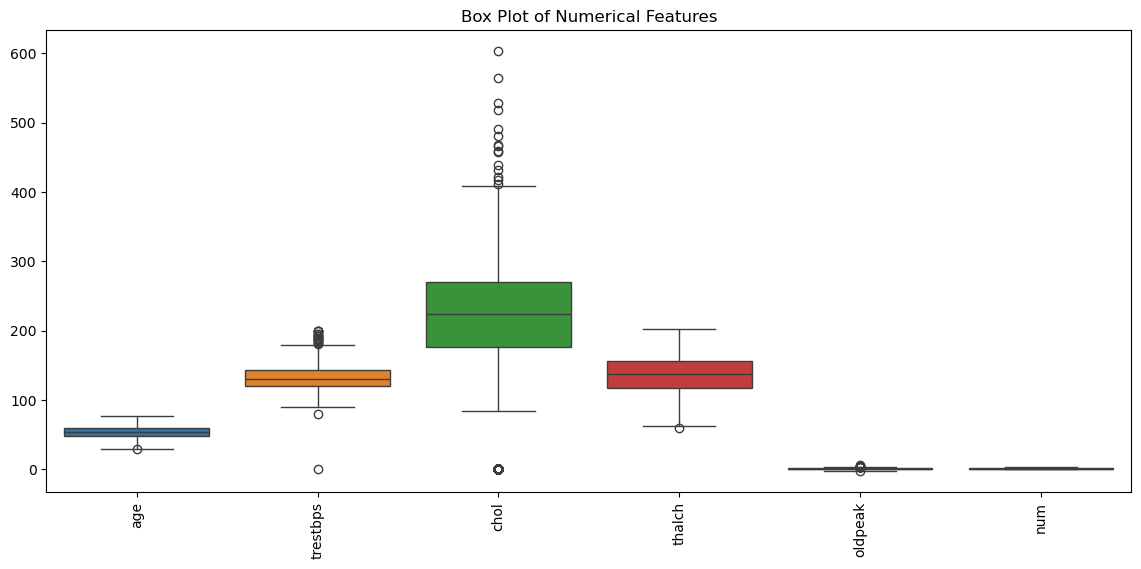

In [23]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features")
plt.show()


### Correlation Matrix

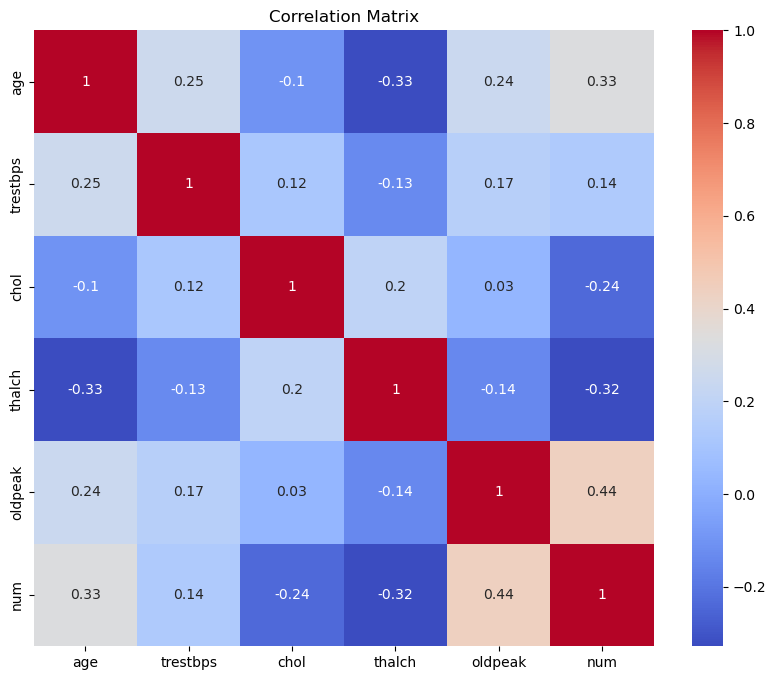

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Task 3: Feature Engineering
Target Variable Understanding

Column num represents heart disease severity

For classification, convert it into binary target
0  → No Heart Disease
1–4 → Heart Disease Present


### Create Binary Target

In [31]:
df['target'] = df['num'].apply(lambda x: 0 if x == 0 else 1)


### Drop Original Severity Column

In [34]:
df = df.drop('num', axis=1)


### Split Features and Target

In [37]:
X = df.drop('target', axis=1)
y = df['target']


## Task 4: Decision Tree Classification
Train–Test Split (80–20)

In [47]:
X = pd.get_dummies(X, drop_first=True)


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


### Train Decision Tree Model

In [51]:

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### Model Evaluation

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Accuracy: 0.7252747252747253
Confusion Matrix:
 [[55 25]
 [25 77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69        80
           1       0.75      0.75      0.75       102

    accuracy                           0.73       182
   macro avg       0.72      0.72      0.72       182
weighted avg       0.73      0.73      0.73       182

ROC-AUC Score: 0.7212009803921569


## Task 5: Hyperparameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

### Best Parameters

In [60]:
grid.best_params_


{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}

### Evaluate Tuned Model

In [63]:
best_model = grid.best_estimator_

y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_best))


Tuned Accuracy: 0.7527472527472527
Confusion Matrix:
 [[56 24]
 [21 81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.70      0.71        80
           1       0.77      0.79      0.78       102

    accuracy                           0.75       182
   macro avg       0.75      0.75      0.75       182
weighted avg       0.75      0.75      0.75       182

ROC-AUC Score: 0.7818014705882352


## Task 6: Model Evaluation and Analysis
Visualize Decision Tree

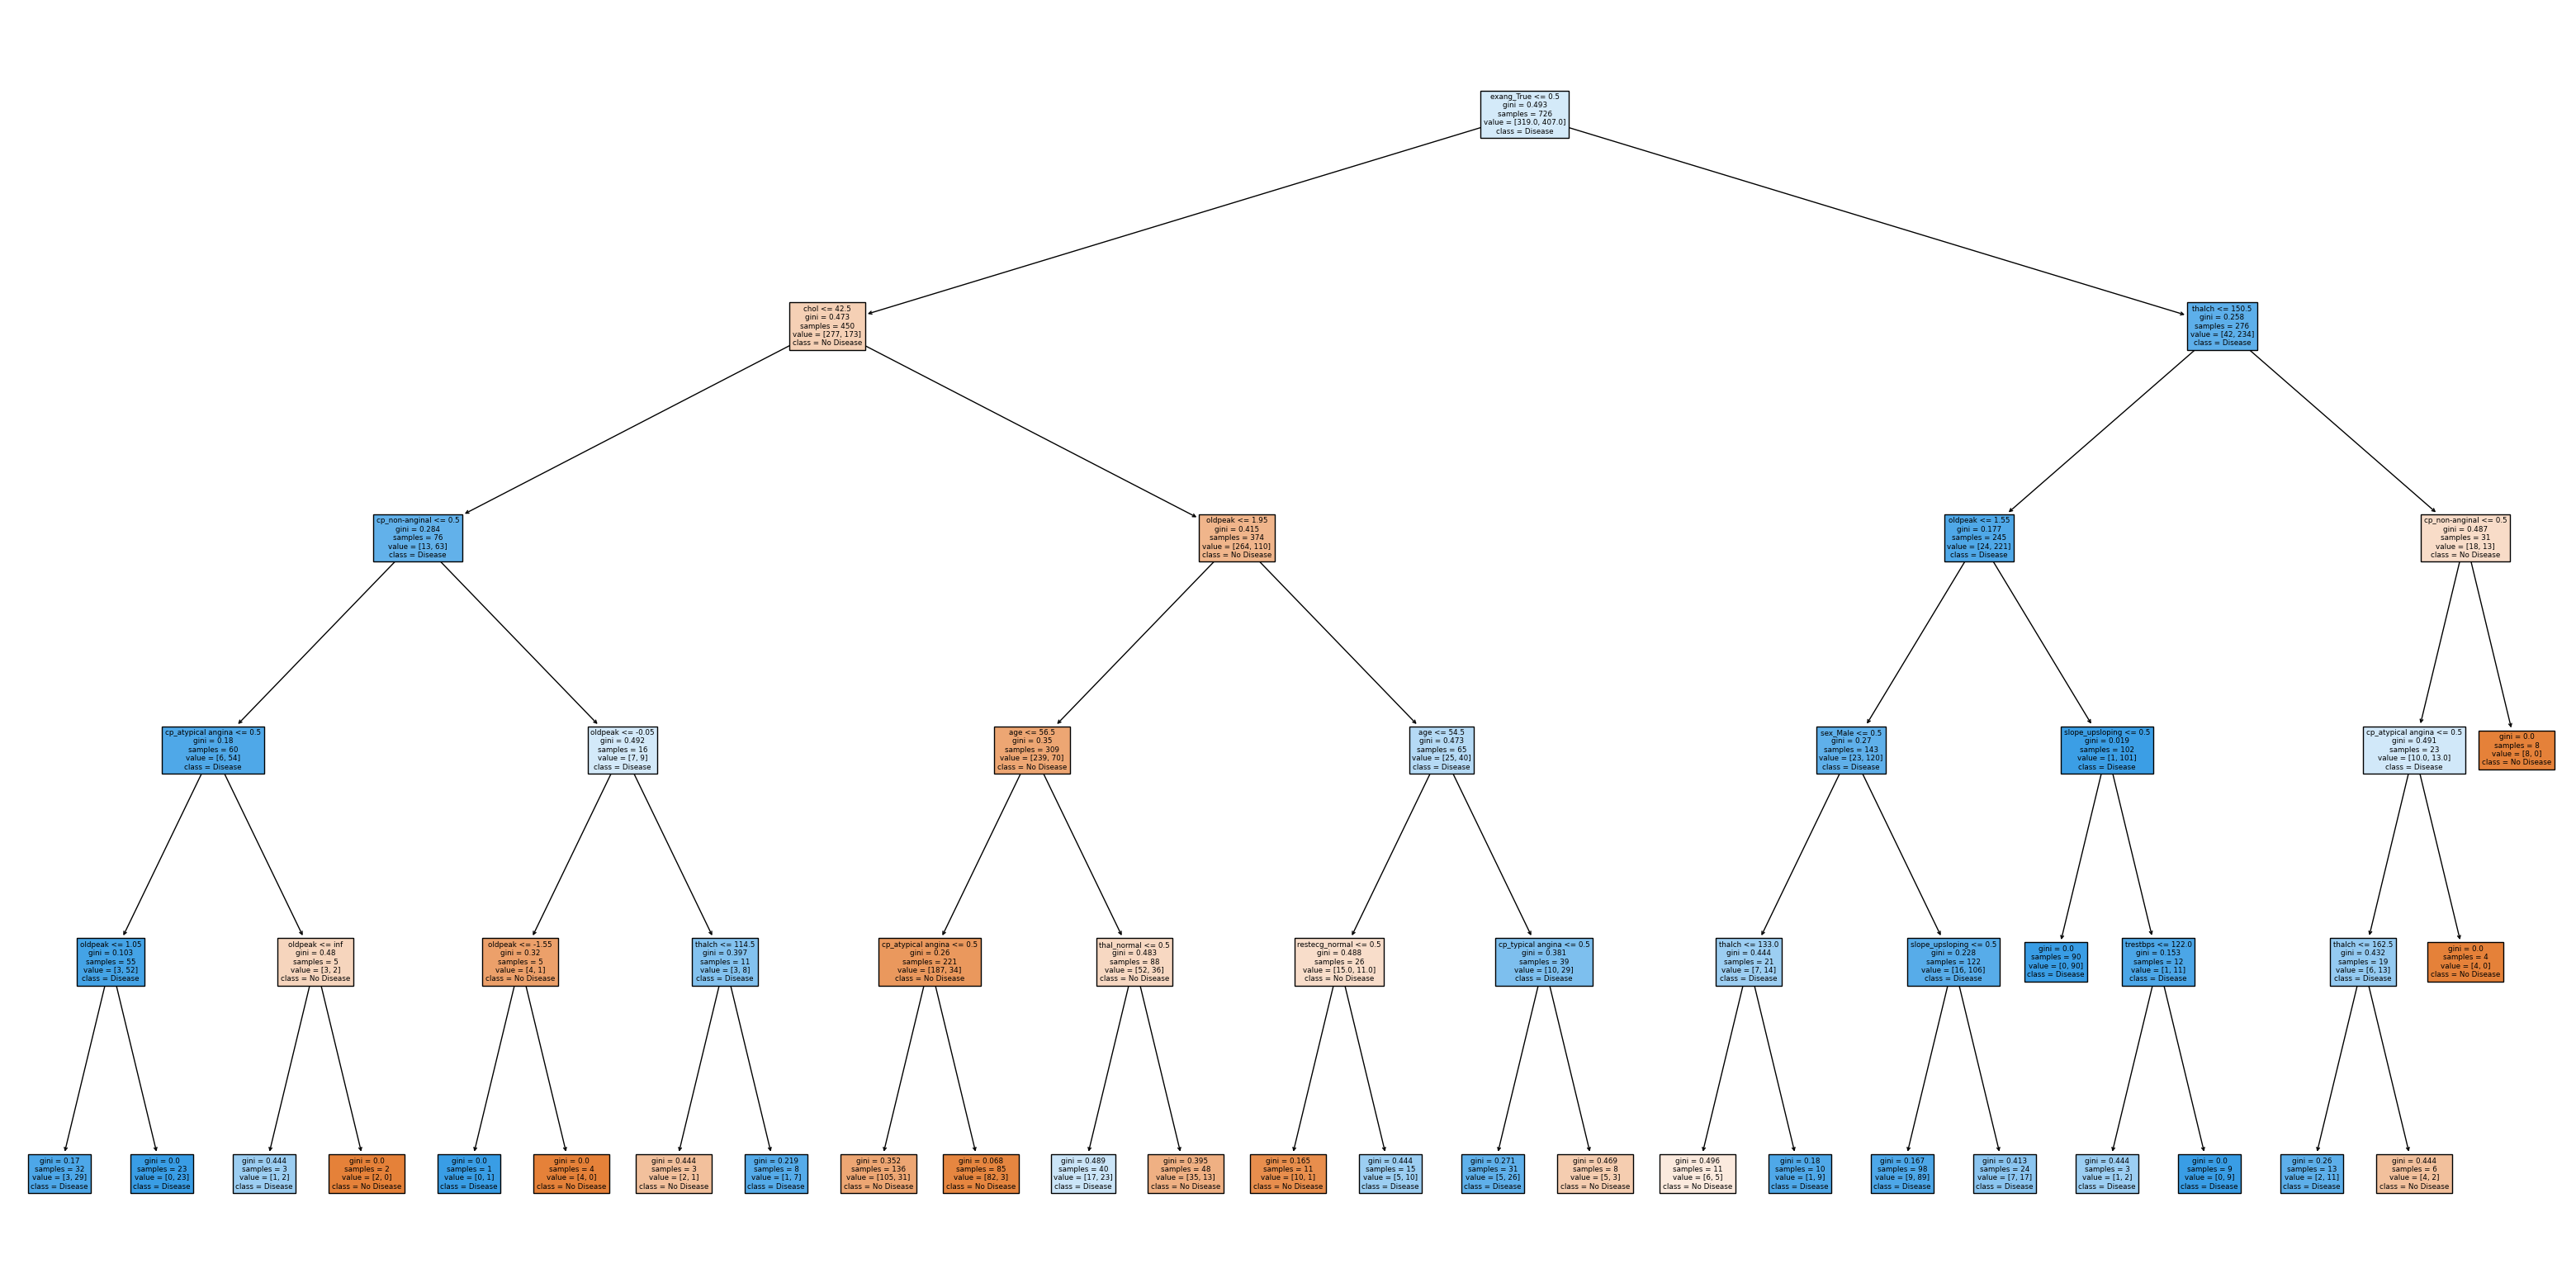

In [68]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40,20))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True
)
plt.show()


### Feature Importance

In [71]:
feature_importance = pd.Series(
    best_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


exang_True                  0.378455
chol                        0.186147
oldpeak                     0.122445
thalch                      0.094481
age                         0.058756
cp_atypical angina          0.049987
cp_non-anginal              0.034360
restecg_normal              0.021674
thal_normal                 0.020797
cp_typical angina           0.014087
slope_upsloping             0.008689
sex_Male                    0.007546
trestbps                    0.002576
restecg_st-t abnormality    0.000000
exang_FALSE                 0.000000
exang_TURE                  0.000000
slope_flat                  0.000000
fbs                         0.000000
thal_reversable defect      0.000000
dtype: float64

## Conclusion

Decision Tree effectively classifies heart disease presence.

Binary target conversion improves model interpretability.

Hyperparameter tuning enhances generalization.

Feature importance helps identify key medical risk factors.

## Interview Questions
### 1. What are common hyperparameters of Decision Tree models?

Answer:

max_depth – controls tree complexity and overfitting

min_samples_split – minimum samples needed to split a node

min_samples_leaf – minimum samples in leaf nodes

criterion – measures split quality (gini, entropy)

### 2. Difference between Label Encoding and One-Hot Encoding?
| Label Encoding                 | One-Hot Encoding            |
| ------------------------------ | --------------------------- |
| Converts categories to numbers | Creates binary columns      |
| May introduce order            | No ordinal relationship     |
| Suitable for trees             | Preferred for linear models |
